# AI Kit

This jupyter notebook series constitutes a miscellaneous collection of code-snippeds for generic tasks in ML/DL-projects. The purpose is to speed up and ease model development by providing content for copying / pasting / and further customization. Each section constitutes a separat jupyter notebook.

#### A - BASICS
1. **Data Preprocessing** - Imputation, Normalization
2. **Oulier Detection** - Univariate Z-Score, Isolation Forest, Elliptic Envelope, DBSCAN
3. **Dimensionality Reduction** - PCA, tSNE

#### B - MACHINE LEARNING (SkLearn)
1. **Model Selection** - Benchmarking Algorithms with default Hyperparameters
2. **Hyperparamter Tuning** - Random Search, Learning Curves

#### C - DEEP LEARNING (Keras)
1. **Neural Nets** - Keras Sequential Model
2. **CNNs** - from Scratch, Transferlearning
3. **RNNs** - from Scratch, Transferlearning
4. **Complex Model Graphs** - Functional Keras API

## Notebook A1 - Data Preprocessing

* [**Fetch Data**](#fd)
* [**Impute Data**](#id)
* [**Convert Data Type**](#cd)
* [**Normalize Data**](#nd)

### Fetch Data <a name="fd"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Directly remove features 'alive' and 'embark_town' which duplicate 'survived' and 'embark'
titanic = titanic.drop(columns=['embark_town', 'alive'])

In [3]:
# Some basic data stats
print('Dimensions: '+ str(titanic.shape))
print('\nStats on numeric features:')
print(titanic.describe())
print('\nTypes:')
print(titanic.dtypes)

Dimensions: (891, 13)

Stats on numeric features:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Types:
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class         category
who             object
adult_male

### Impute Data <a name="id"></a>

In [4]:
# Check NAs
titanic.loc[:, titanic.isna().sum()>0].isna().sum()

age         177
embarked      2
deck        688
dtype: int64

In [5]:
# Drop feature 'deck' with too many NAs
titanic = titanic.drop(columns='deck')

In [6]:
# Impute age with average
titanic.loc[titanic.age.isna(), 'age'] = titanic.age.mean()

In [7]:
# Impute embarked with most frequent
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [8]:
titanic.loc[titanic.embarked.isna(), 'embarked'] = 'S'

In [9]:
# Alternatively impute several columns at once with the SimpleImputer
from sklearn.impute import SimpleImputer

imp_mf = SimpleImputer(strategy='most_frequent')
titanic[['embarked', 'class']] = imp_mf.fit_transform(titanic[['embarked', 'class']])

In [10]:
# Check NAs
titanic.isna().sum().sum()

0

### Convert Data Type <a name="cd"></a>

In [11]:
# One hot encode categorical features
titanic_categorical = titanic.loc[:, (titanic.dtypes=='object') | (titanic.dtypes=='category')]
titanic = titanic.drop(columns=titanic_categorical.columns)
titanic = titanic.join(pd.get_dummies(titanic_categorical, drop_first=True))

# Convert everything to float32
titanic = titanic.astype('float32')
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman
0,0.0,3.0,22.0,1.0,0.0,7.250000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,1.0,38.0,1.0,0.0,71.283302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3.0,26.0,0.0,0.0,7.925000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.099998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.050000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


### Normalize Data <a name="nd"></a>

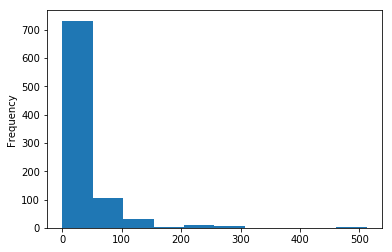

In [12]:
# Check distri of 'price'
titanic.fare.plot.hist()

In [13]:
# Lognormalize 'price'
titanic['fare'] = np.log(titanic.fare+1)

In [16]:
# Normalize non-categorical features
titanic.loc[:, 'pclass':'fare'] = (titanic.loc[:, 'pclass':'fare'] - titanic.loc[:, 'pclass':'fare'].mean()) /\
                                                                     titanic.loc[:, 'pclass':'fare'].std()

C:\Users\g.spiegel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\g.spiegel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\g.spiegel\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\g.spiegel\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encount

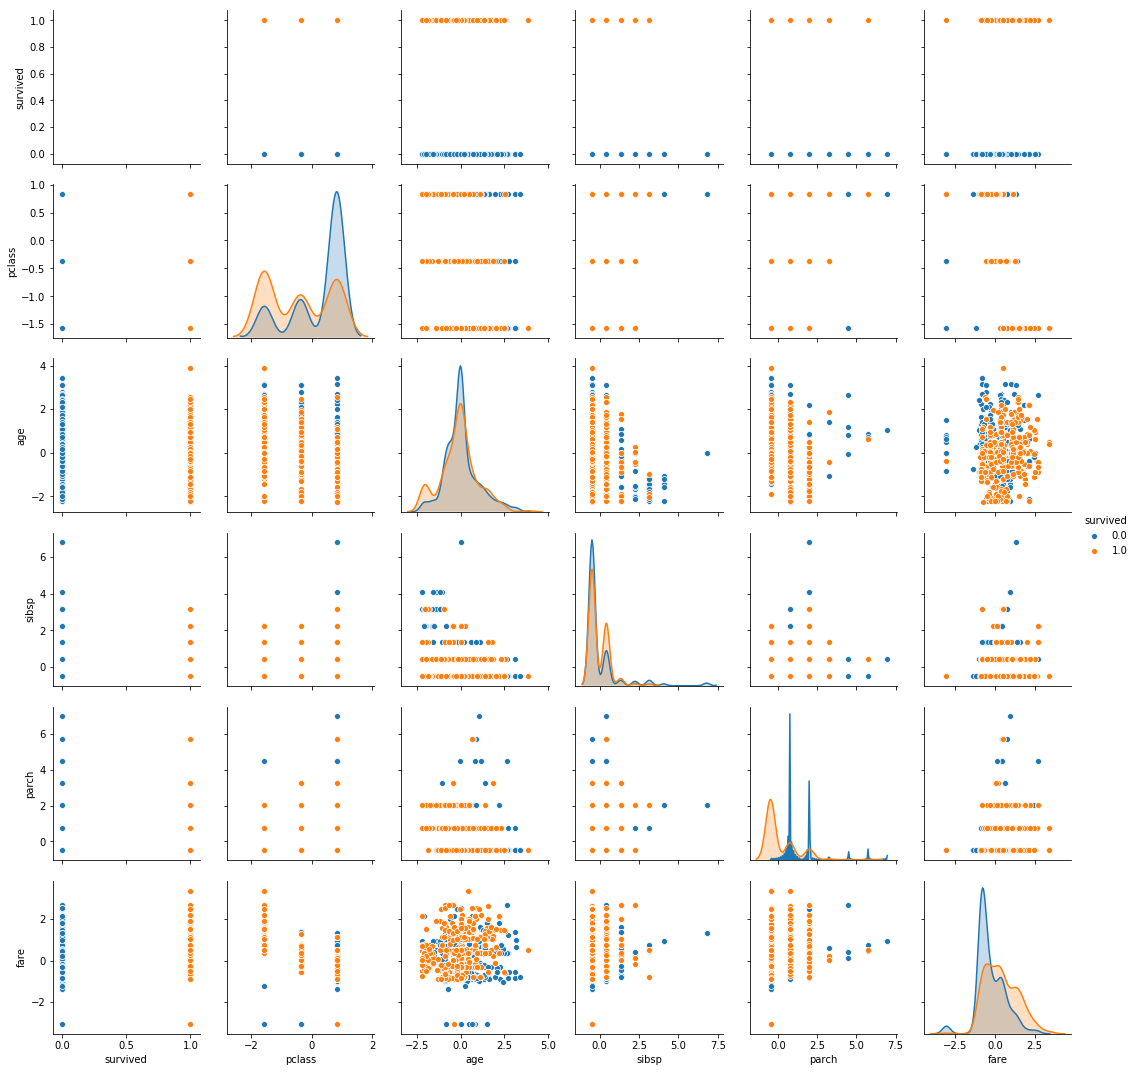

In [17]:
# Check normalized data
sns.pairplot(titanic.loc[:, 'survived':'fare'], hue='survived')